# Crime and Weather-ment

Will certain weather conditions be statistically related to increases in crime?


Notes about weather file:
* Retrieved from https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00154958/detail

Notes about crime files: 
* .csv files retrieved from https://data.louisvilleky.gov/
* 'Crime_Data_2003.csv' only has ~19,000 crimes reported when years 2004-2020 range from ~71,000 to ~91,000 crime reports/year. So, 2003 was left out of the anaylsis
* 'Crime_Data_2019.csv' has reports from 2019-2021


Notes about weather:
* Weather statements (ex: precipitation amounts, min temp) cannot be linked to the exact time of the crime occurence with this data.


In [141]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats

louisville_weather=pd.read_csv("data/2451549.csv") #Weather from 1-1-1997 til 2-9-2021

#2017 --> 7305
#2018--> 7670


df_index_start = 7305 

crime_files = ['Crime_Data_2017_9.csv','Crime_Data_2018.csv', 'Crime_Data_2019.csv']

# crime_files = ['Crime_Data_2004.csv', 'Crime_Data_2005.csv', 'Crime_Data_2006.csv','Crime_Data_2007.csv','Crime_Data_2008.csv','Crime_Data_2009.csv','Crime_Data_2010.csv','Crime_Data_2011.csv','Crime_Data_2012.csv','Crime_Data_2013.csv','Crime_Data_2014.csv','Crime_Data_2015.csv','Crime_Data_2016_39.csv','Crime_Data_2017_9.csv', 'Crime_Data_2018.csv', 'Crime_Data_2019.csv']

list_of_crime_dfs = []

for file in crime_files:
    df = pd.read_csv("data/"+file, index_col=None, header=0)
    list_of_crime_dfs.append(df)

concat_crime_df = pd.concat(list_of_crime_dfs, axis=0, ignore_index=True)

# concat_crime_df = concat_crime_df.drop_duplicates(subset=['INCIDENT_NUMBER'])
print("The number of crimes listed: ", len(concat_crime_df), ". Number of unique incident numbers: ", len(concat_crime_df["INCIDENT_NUMBER"].unique()) )

total_counts = concat_crime_df['CRIME_TYPE'].value_counts()
total_counts





The number of crimes listed:  310836 . Number of unique incident numbers:  254623


ASSAULT                     58503
THEFT/LARCENY               57517
DRUGS/ALCOHOL VIOLATIONS    43376
OTHER                       33407
VEHICLE BREAK-IN/THEFT      25958
VANDALISM                   23479
BURGLARY                    20308
MOTOR VEHICLE THEFT         17062
FRAUD                       16382
WEAPONS                      5519
ROBBERY                      4890
SEX CRIMES                   2064
DISTURBING THE PEACE         1646
HOMICIDE                      494
ARSON                         206
DUI                            25
Name: CRIME_TYPE, dtype: int64

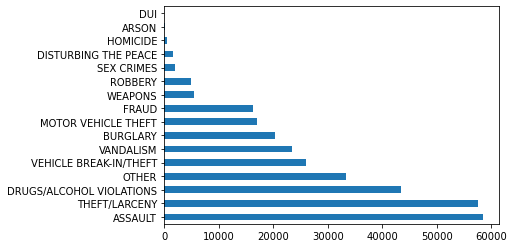

In [142]:
total_counts.plot.barh(x='Number of crimes' )

In [143]:
#Strips the time from date/time
concat_crime_df['DATE_OCCURED_NOTIME'] = concat_crime_df['DATE_OCCURED'].str.split(' ').str[0]
# crime_2019['DATE_OCCURED_NOTIME']
concat_crime_df['Report-Occur-Difference']= pd.to_datetime(concat_crime_df['DATE_REPORTED'].str.split(' ').str[0]) - pd.to_datetime(concat_crime_df['DATE_OCCURED'].str.split(' ').str[0])
# crime_2019
# number = crime_2019['Report-Occur-Difference'].dt.days.sum()
# number = crime_2019['Report-Occur-Difference'].dt.days.max()
# number = crime_2019['Report-Occur-Difference'].dt.days.mode()

concat_crime_df['Report-Occur-Difference'].value_counts()
# crime_2019['Report-Occur-Difference'].barh(x="number")

0 days        206264
1 days         39131
2 days         17066
3 days          8046
4 days          5089
               ...  
1030 days          1
4151 days          1
1447 days          1
13514 days         1
6105 days          1
Name: Report-Occur-Difference, Length: 1806, dtype: int64

In [144]:
louisville_weather['PRCP'].describe()   #describe precipitation column
# louisville_weather['DATE']


count    8803.000000
mean        0.148638
std         0.400267
min         0.000000
25%         0.000000
50%         0.000000
75%         0.070000
max        10.480000
Name: PRCP, dtype: float64

In [145]:
# louisville_weather.describe()
louisville_weather.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'MDPR',
       'MDPR_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES',
       'SNWD', 'SNWD_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN',
       'TMIN_ATTRIBUTES', 'TOBS', 'TOBS_ATTRIBUTES', 'WESD', 'WESD_ATTRIBUTES',
       'WT01', 'WT01_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES', 'WT04',
       'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES', 'WT06', 'WT06_ATTRIBUTES',
       'WT11', 'WT11_ATTRIBUTES'],
      dtype='object')

In [147]:
date_crime_count_df = louisville_weather[['DATE','PRCP','SNOW','TMAX','TMIN']].iloc[df_index_start:8766]
date_crime_count_df['DOW'] = pd.to_datetime(date_crime_count_df['DATE']).dt.day_name()
date_crime_count_df['DOW-N'] = pd.to_datetime(date_crime_count_df['DATE']).dt.dayofweek  #DOW-Number 0=Monday, 1=Tuesday...

date_crime_count_df['Day'] = pd.to_datetime(date_crime_count_df['DATE']).dt.day
date_crime_count_df['Month'] = pd.to_datetime(date_crime_count_df['DATE']).dt.month
date_crime_count_df['Year'] = pd.to_datetime(date_crime_count_df['DATE']).dt.year


date_crime_count_df

DATE  PRCP  SNOW  TMAX  TMIN        DOW  DOW-N  Day  Month  Year
7305  2017-01-01  0.02   0.0  48.0  35.0     Sunday      6    1      1  2017
7306  2017-01-02  0.05   0.0  58.0  45.0     Monday      0    2      1  2017
7307  2017-01-03  0.44   0.0  59.0  40.0    Tuesday      1    3      1  2017
7308  2017-01-04  0.00   0.0  40.0  24.0  Wednesday      2    4      1  2017
7309  2017-01-05  0.10   2.6  24.0  17.0   Thursday      3    5      1  2017
...          ...   ...   ...   ...   ...        ...    ...  ...    ...   ...
8761  2020-12-27  0.00   0.0  57.0  30.0     Sunday      6   27     12  2020
8762  2020-12-28  0.00   0.0  53.0  28.0     Monday      0   28     12  2020
8763  2020-12-29  0.00   0.0  39.0  29.0    Tuesday      1   29     12  2020
8764  2020-12-30  1.00   0.0  58.0  34.0  Wednesday      2   30     12  2020
8765  2020-12-31  0.41   0.0  37.0  32.0   Thursday      3   31     12  2020

[1461 rows x 10 columns]

In [148]:
import time
start = time.time()

#Take all of the crime types for the day, count them, and put them in a series to be connected to the specific day
crime_series=[]
assault_series=[]
theft_series=[]
other_series=[]
drugs_series=[]
vehicle_break_series=[]
vandalism_series=[]
burglary_series=[]
motor_vehicle_theft_series=[]
fraud_series=[]
robbery_series=[]
weapons_series=[]
sex_crimes_series=[]
disturbing_peace_series=[]
homicide_series=[]
arson_series=[]
dui_series=[]
 
for date in date_crime_count_df['DATE']:
    crime_series.append((concat_crime_df['DATE_OCCURED_NOTIME']==date).sum())
    assault_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="ASSAULT") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    theft_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="THEFT/LARCENY") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    other_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="OTHER") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    drugs_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="DRUGS/ALCOHOL VIOLATIONS") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    vehicle_break_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="VEHICLE BREAK-IN/THEFT") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    vandalism_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="VANDALISM") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    burglary_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="BURGLARY") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    motor_vehicle_theft_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="MOTOR VEHICLE THEFT") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    fraud_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="FRAUD") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    robbery_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="ROBBERY") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    weapons_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="WEAPONS") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    sex_crimes_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="SEX CRIMES") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    disturbing_peace_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="DISTURBING THE PEACE") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    homicide_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="HOMICIDE") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    arson_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="ARSON") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    dui_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="DUI") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
 
 
# print(sum(dui_series))
# print(sum(arson_series))
# print(sum(homicide_series))
end = time.time()
print("The cell took: ", (end-start)/60, " minutes to run.")


The cell took:  19.766100935141246  minutes to run.


The previous cell took:  265.72447276910145  minutes to run.


In [149]:
date_crime_count_df['NUMBER_OF_CRIMES'] = crime_series
date_crime_count_df['ASSAULT'] = assault_series
date_crime_count_df['THEFT'] = theft_series
date_crime_count_df['OTHER'] = other_series
date_crime_count_df['DRUGS'] = drugs_series
date_crime_count_df['VEHICLE BREAKINS'] = vehicle_break_series
date_crime_count_df['VANDALISM'] = vandalism_series
date_crime_count_df['BURGLARY'] = burglary_series
date_crime_count_df['MOTOR VEHICLE THEFT'] = motor_vehicle_theft_series
date_crime_count_df['FRAUD'] = fraud_series
date_crime_count_df['ROBBERY'] = robbery_series
date_crime_count_df['WEAPONS'] = weapons_series
date_crime_count_df['SEX CRIMES'] = sex_crimes_series
date_crime_count_df['DISTURBING PEACE'] = disturbing_peace_series
date_crime_count_df['HOMICIDE'] = homicide_series
date_crime_count_df['ARSON'] = arson_series
date_crime_count_df['DUI'] = dui_series



In [150]:
date_crime_count_df

DATE  PRCP  SNOW  TMAX  TMIN        DOW  DOW-N  Day  Month  Year  \
7305  2017-01-01  0.02   0.0  48.0  35.0     Sunday      6    1      1  2017   
7306  2017-01-02  0.05   0.0  58.0  45.0     Monday      0    2      1  2017   
7307  2017-01-03  0.44   0.0  59.0  40.0    Tuesday      1    3      1  2017   
7308  2017-01-04  0.00   0.0  40.0  24.0  Wednesday      2    4      1  2017   
7309  2017-01-05  0.10   2.6  24.0  17.0   Thursday      3    5      1  2017   
...          ...   ...   ...   ...   ...        ...    ...  ...    ...   ...   
8761  2020-12-27  0.00   0.0  57.0  30.0     Sunday      6   27     12  2020   
8762  2020-12-28  0.00   0.0  53.0  28.0     Monday      0   28     12  2020   
8763  2020-12-29  0.00   0.0  39.0  29.0    Tuesday      1   29     12  2020   
8764  2020-12-30  1.00   0.0  58.0  34.0  Wednesday      2   30     12  2020   
8765  2020-12-31  0.41   0.0  37.0  32.0   Thursday      3   31     12  2020   

      ...  BURGLARY  MOTOR VEHICLE THEFT  FRAUD  ROBBERY  WEAPONS  SEX CRIMES  \
7305  ...        22                   11     56        4        6          45   
7306  ...        30                   12     13        3        3           3   
7307  ...        21                   13     11        1        3           0   
7308  ...         9                   11      9        3        8           0   
7309  ...        20                   19     14        3        5           0   
...   ...       ...                  ...    ...      ...      ...         ...   
8761  ...         6                   12      3        3        2           1   
8762  ...        11                   15     12        6        9           0   
8763  ...        10                   22      9        2        3           0   
8764  ...        12                   15      5        1        3           0   
8765  ...        15                   18     10        2        2           0   

      DISTURBING PEACE  HOMICIDE  ARSON  DUI  
7305                 1         0      1    0  
7306                 5         0      0    0  
7307                 0         0      0    0  
7308                 1         0      0    0  
7309                 1         0      0    0  
...                ...       ...    ...  ...  
8761                 1         1      0    0  
8762                 1         0      1    0  
8763                 1         1      0    0  
8764                 0         2      0    0  
8765                 0         0      0    0  

[1461 rows x 27 columns]

In [151]:
date_crime_count_df['DOW'] = date_crime_count_df['DOW'].astype(str)

In [152]:
print(date_crime_count_df.dtypes)

DATE                    object
PRCP                   float64
SNOW                   float64
TMAX                   float64
TMIN                   float64
DOW                     object
DOW-N                    int64
Day                      int64
Month                    int64
Year                     int64
NUMBER_OF_CRIMES         int64
ASSAULT                  int64
THEFT                    int64
OTHER                    int64
DRUGS                    int64
VEHICLE BREAKINS         int64
VANDALISM                int64
BURGLARY                 int64
MOTOR VEHICLE THEFT      int64
FRAUD                    int64
ROBBERY                  int64
WEAPONS                  int64
SEX CRIMES               int64
DISTURBING PEACE         int64
HOMICIDE                 int64
ARSON                    int64
DUI                      int64
dtype: object


In [153]:
# date_crime_count_df['PRCP'].describe()
zero_days = (date_crime_count_df['PRCP']==0).sum()
nonzero_days = (date_crime_count_df['PRCP']>0).sum()
print("Number of days with no precipitation: ",zero_days, " - Percentage: ", zero_days/(zero_days+nonzero_days))  # How many zeros are there
print("Number of days with some precipitation: ", nonzero_days, " - Percentage: ", nonzero_days/(zero_days+nonzero_days))
print("Number of days with snow: ", (date_crime_count_df['SNOW']>0).sum())

Number of days with no precipitation:  894  - Percentage:  0.6119096509240246
Number of days with some precipitation:  567  - Percentage:  0.38809034907597534
Number of days with snow:  48


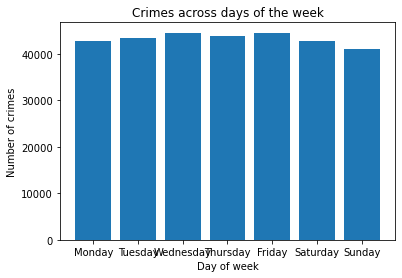

In [154]:
monday_crimes = date_crime_count_df.loc[date_crime_count_df['DOW'] == 'Monday', 'NUMBER_OF_CRIMES'].sum()
tuesday_crimes = date_crime_count_df.loc[date_crime_count_df['DOW'] == 'Tuesday', 'NUMBER_OF_CRIMES'].sum()
wednesday_crimes = date_crime_count_df.loc[date_crime_count_df['DOW'] == 'Wednesday', 'NUMBER_OF_CRIMES'].sum()
thursday_crimes = date_crime_count_df.loc[date_crime_count_df['DOW'] == 'Thursday', 'NUMBER_OF_CRIMES'].sum()
friday_crimes = date_crime_count_df.loc[date_crime_count_df['DOW'] == 'Friday', 'NUMBER_OF_CRIMES'].sum()
saturday_crimes = date_crime_count_df.loc[date_crime_count_df['DOW'] == 'Saturday', 'NUMBER_OF_CRIMES'].sum()
sunday_crimes = date_crime_count_df.loc[date_crime_count_df['DOW'] == 'Sunday', 'NUMBER_OF_CRIMES'].sum()


x = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
DOW = [monday_crimes, tuesday_crimes, wednesday_crimes, thursday_crimes, friday_crimes, saturday_crimes, sunday_crimes]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, DOW)
plt.xlabel("Day of week")
plt.ylabel("Number of crimes")
plt.title("Crimes across days of the week")

plt.xticks(x_pos, x)

plt.show()


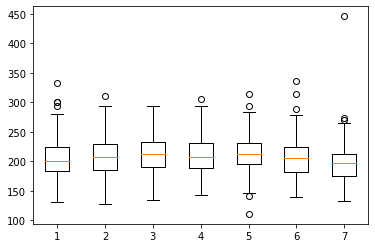

In [155]:
DOW=[]
DOWList=['Monday', 'Tuesday','Wednesday', 'Thursday','Friday','Saturday', 'Sunday']
for x in DOWList:
    DOW.append(date_crime_count_df.loc[date_crime_count_df['DOW'] == x, 'NUMBER_OF_CRIMES'])

averageCrimesOnDOM= plt.boxplot(DOW)

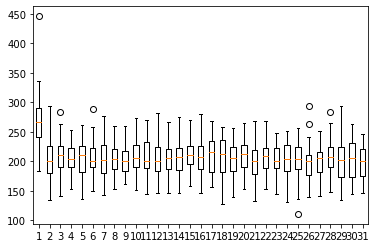

In [156]:
DOM=[]
for x in range(1,32):
    DOM.append(date_crime_count_df.loc[date_crime_count_df['Day'] == x, 'NUMBER_OF_CRIMES'])


averageCrimesOnDOM= plt.boxplot(DOM)



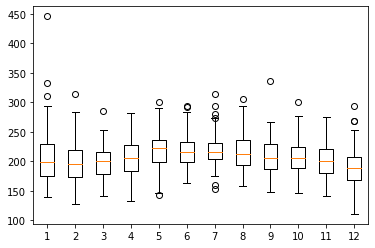

In [157]:
#Do we still get the same unequal distribution when we limit large differences in report vs occurrence dates

MOY=[]
for x in range(1,13):
    MOY.append(date_crime_count_df.loc[date_crime_count_df['Month'] == x, 'NUMBER_OF_CRIMES'])


averageCrimesOnMOY= plt.boxplot(MOY)



[79684, 72753]


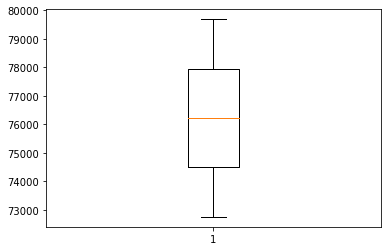

In [158]:
Year=[]
# yearList=[2004,2005,2006,2007,2008,2009,2010,2011,2012, 2013,2014,2015,2016,2017,2019,2020]
yearList=[2018,2019]
for x in yearList:
    Year.append(date_crime_count_df.loc[date_crime_count_df['Year'] == x, 'NUMBER_OF_CRIMES'].sum())

print(Year)

averageCrimesOnYear= plt.boxplot(Year)

.00-.19 “very weak”

.20-.39 “weak”

.40-.59 “moderate”

.60-.79 “strong”

.80-1.0 “very strong”


(-0.09575395670868195, 0.0002470504050387566)
(0.2835305678841182, 2.055576900985186e-28)
(0.28833957783292197, 2.2744279590038867e-29)


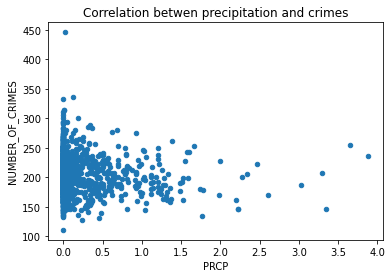

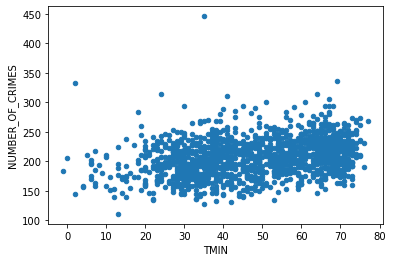

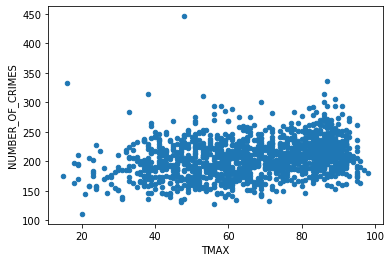

In [159]:
#What is the correlation between weather and number of crimes per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['NUMBER_OF_CRIMES']))
date_crime_count_df.plot(x='PRCP', y='NUMBER_OF_CRIMES', kind='scatter', title="Correlation betwen precipitation and crimes" )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['NUMBER_OF_CRIMES']))
date_crime_count_df.plot(x='TMIN', y='NUMBER_OF_CRIMES', kind='scatter', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['NUMBER_OF_CRIMES']))
date_crime_count_df.plot(x='TMAX', y='NUMBER_OF_CRIMES', kind='scatter', )

(-0.07759140320919976, 0.003000224663884564)


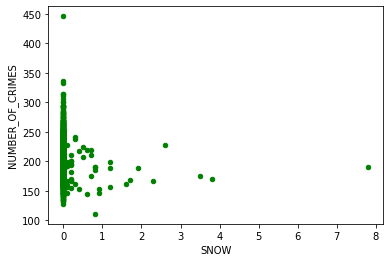

In [160]:
#What is the correlation between snow amounts and number of crimes per day
print(stats.pearsonr(date_crime_count_df['SNOW'],date_crime_count_df['NUMBER_OF_CRIMES']))
#Scatter plot for snow and number of crimes
date_crime_count_df.plot(x='SNOW', y='NUMBER_OF_CRIMES', kind='scatter', color='green', )

(-0.08281405827183666, 0.0015341867052707102)
(0.34671951463440653, 1.5871373581120658e-42)
(0.35437959187120016, 1.7838162408237803e-44)


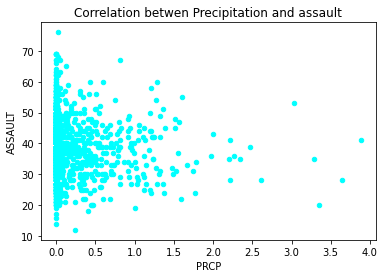

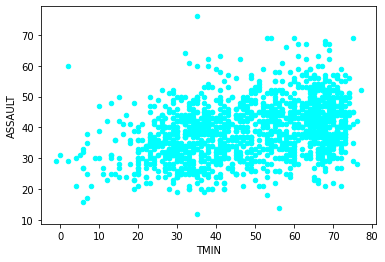

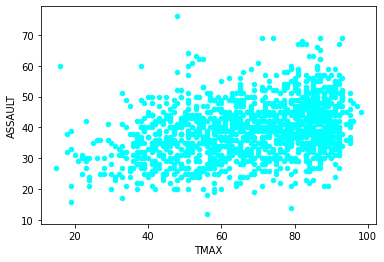

In [161]:
#What is the correlation between weather and number of assaults per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['ASSAULT']))
date_crime_count_df.plot(x='PRCP', y='ASSAULT', kind='scatter', color='aqua', title="Correlation betwen Precipitation and assault" )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['ASSAULT']))
date_crime_count_df.plot(x='TMIN', y='ASSAULT', kind='scatter', color='aqua', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['ASSAULT']))
date_crime_count_df.plot(x='TMAX', y='ASSAULT', kind='scatter', color='aqua', )

(-0.012447798988737255, 0.6344992079142906)
(0.10843541698702362, 3.275216580759652e-05)
(0.10475739301076223, 6.026770709795086e-05)


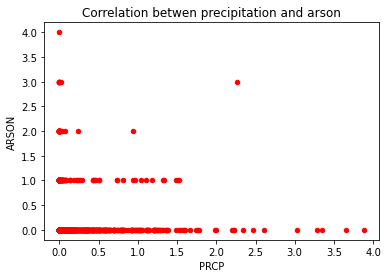

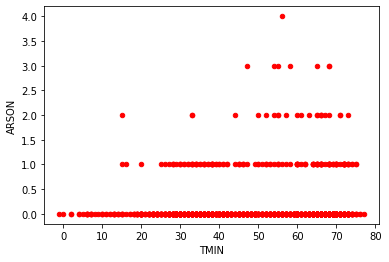

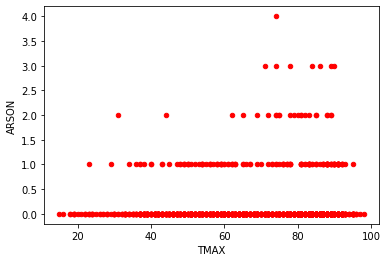

In [162]:
#What is the correlation between weather and arsons per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['ARSON']))
date_crime_count_df.plot(x='PRCP', y='ARSON', kind='scatter', color='red', title="Correlation betwen precipitation and arson" )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['ARSON']))
date_crime_count_df.plot(x='TMIN', y='ARSON', kind='scatter', color='red', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['ARSON']))
date_crime_count_df.plot(x='TMAX', y='ARSON', kind='scatter', color='red', )

(-0.0012312761828397025, 0.9624950224554515)
(0.044148682240362086, 0.09162748093216082)
(0.04674931518047755, 0.07404297465970451)


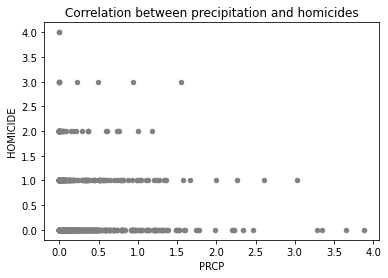

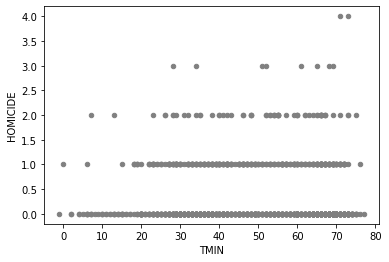

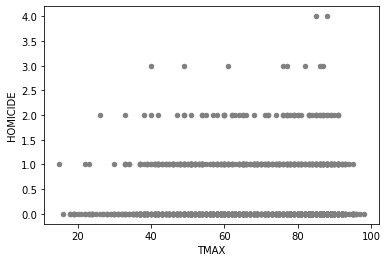

In [163]:
#What is the correlation between weather and Homicides per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['HOMICIDE']))
date_crime_count_df.plot(x='PRCP', y='HOMICIDE', kind='scatter', color='grey', title="Correlation between precipitation and homicides")

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['HOMICIDE']))
date_crime_count_df.plot(x='TMIN', y='HOMICIDE', kind='scatter', color='grey', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['HOMICIDE']))
date_crime_count_df.plot(x='TMAX', y='HOMICIDE', kind='scatter', color='grey', )

(-0.05795864050829827, 0.02673803648942896)
(0.2236817376361191, 5.045766578467077e-18)
(0.23447801921922237, 1.0690485986960439e-19)


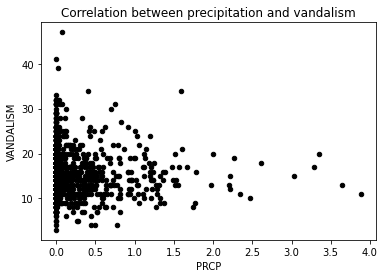

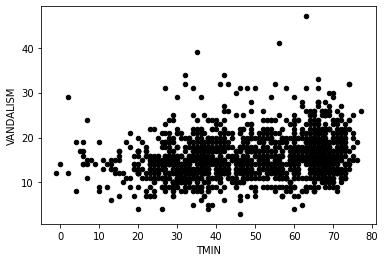

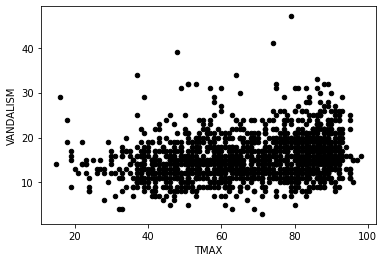

In [164]:
#What is the correlation between weather and vandalisms per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['VANDALISM']))
date_crime_count_df.plot(x='PRCP', y='VANDALISM', kind='scatter', color='black', title="Correlation between precipitation and vandalism")

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['VANDALISM']))
date_crime_count_df.plot(x='TMIN', y='VANDALISM', kind='scatter', color='black', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['VANDALISM']))
date_crime_count_df.plot(x='TMAX', y='VANDALISM', kind='scatter', color='black', )

(-0.010402513903837096, 0.6911565542622862)
(0.16031646509858616, 7.16346694276444e-10)
(0.16112113779638496, 5.873988923180672e-10)


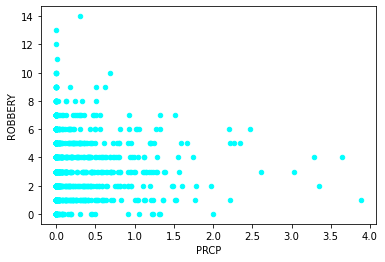

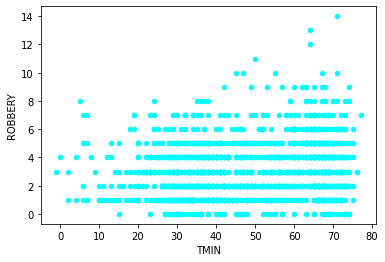

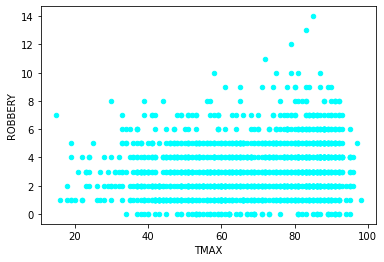

In [165]:
#What is the correlation between Precipitation and robbery per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['ROBBERY']))
date_crime_count_df.plot(x='PRCP', y='ROBBERY', kind='scatter', color='aqua', )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['ROBBERY']))
date_crime_count_df.plot(x='TMIN', y='ROBBERY', kind='scatter', color='aqua', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['ROBBERY']))
date_crime_count_df.plot(x='TMAX', y='ROBBERY', kind='scatter', color='aqua', )

(-0.019733538420740174, 0.451027329569051)
(0.20965127302026262, 5.642731614530019e-16)
(0.19021429529243097, 2.278011785991595e-13)


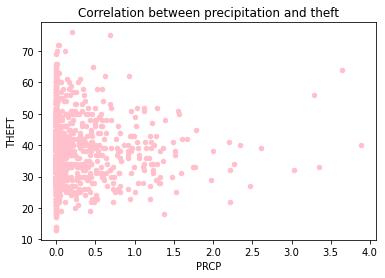

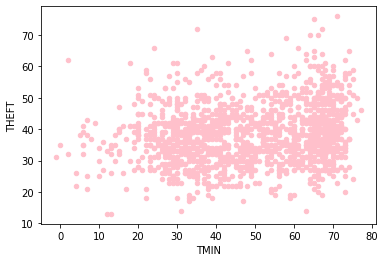

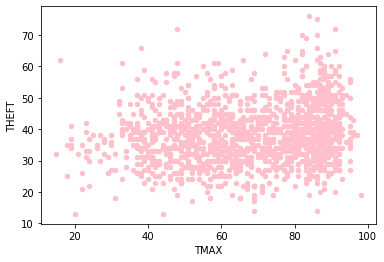

In [166]:
#What is the correlation between Precipitation and Theft per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['THEFT']))
date_crime_count_df.plot(x='PRCP', y='THEFT', kind='scatter', color='pink', title="Correlation between precipitation and theft" )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['THEFT']))
date_crime_count_df.plot(x='TMIN', y='THEFT', kind='scatter', color='pink', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['THEFT']))
date_crime_count_df.plot(x='TMAX', y='THEFT', kind='scatter', color='pink', )

(-0.07454155721021816, 0.0043618699575323225)
(-0.06329886056720375, 0.015527753705090214)
(-0.05551660795240134, 0.03385174932203395)


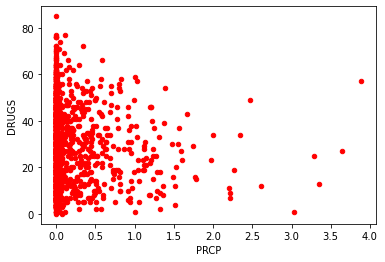

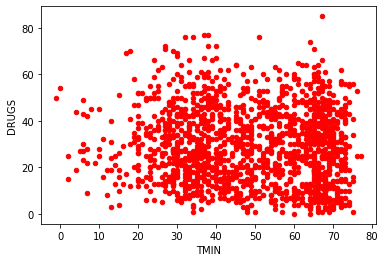

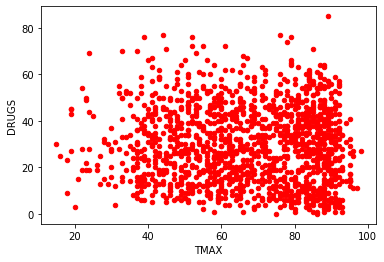

In [167]:
#What is the correlation between weather and drugs per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['DRUGS']))
date_crime_count_df.plot(x='PRCP', y='DRUGS', kind='scatter', color='red', )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['DRUGS']))
date_crime_count_df.plot(x='TMIN', y='DRUGS', kind='scatter', color='red', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['DRUGS']))
date_crime_count_df.plot(x='TMAX', y='DRUGS', kind='scatter', color='red', )

(0.01593325457297695, 0.5428329501525082)
(0.02381965333140176, 0.36292318381658367)
(0.019794964860931068, 0.449619218438807)


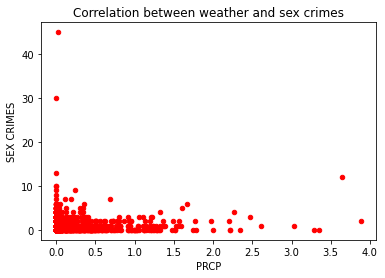

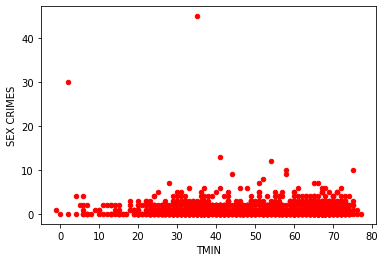

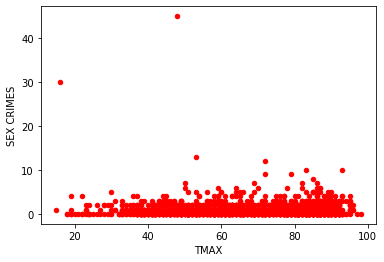

In [168]:
#What is the correlation between weather and sex crimes per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['SEX CRIMES']))
date_crime_count_df.plot(x='PRCP', y='SEX CRIMES', kind='scatter', color='red', title="Correlation between weather and sex crimes" )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['SEX CRIMES']))
date_crime_count_df.plot(x='TMIN', y='SEX CRIMES', kind='scatter', color='red', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['SEX CRIMES']))
date_crime_count_df.plot(x='TMAX', y='SEX CRIMES', kind='scatter', color='red', )

(-0.027037804746366266, 0.301711052363254)
(0.16961119381441409, 6.807692385418513e-11)
(0.15680619516107497, 1.6828560789804267e-09)


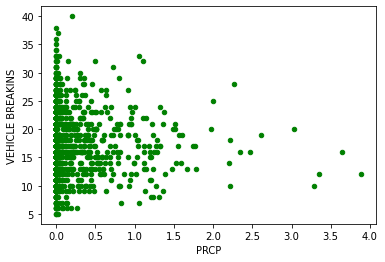

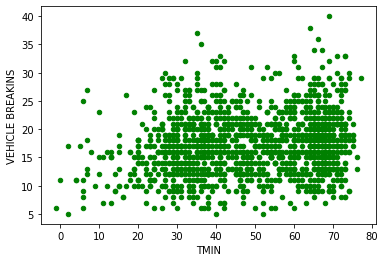

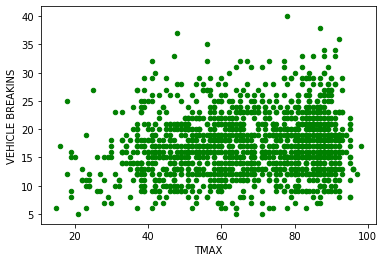

In [169]:
#What is the correlation between weather and vehicle break-ins per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['VEHICLE BREAKINS']))
date_crime_count_df.plot(x='PRCP', y='VEHICLE BREAKINS', kind='scatter', color='green', )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['VEHICLE BREAKINS']))
date_crime_count_df.plot(x='TMIN', y='VEHICLE BREAKINS', kind='scatter', color='green', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['VEHICLE BREAKINS']))
date_crime_count_df.plot(x='TMAX', y='VEHICLE BREAKINS', kind='scatter', color='green', )


(-0.02889447606724388, 0.26971481005054293)
(0.2343188157560236, 1.1331973378422915e-19)
(0.233156334144229, 1.7319399162060395e-19)


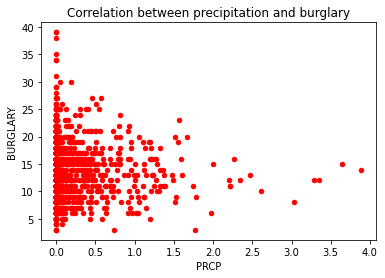

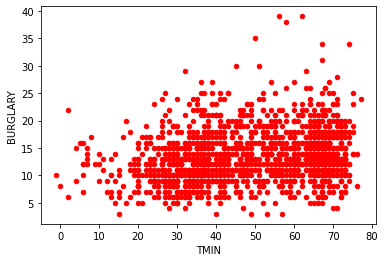

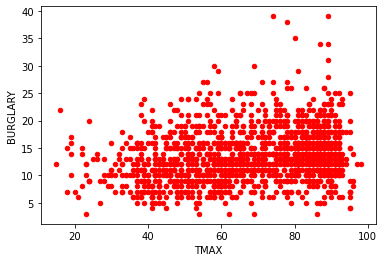

In [170]:
#What is the correlation between weather and burglary per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['BURGLARY']))
date_crime_count_df.plot(x='PRCP', y='BURGLARY', kind='scatter', color='red', title="Correlation between precipitation and burglary" )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['BURGLARY']))
date_crime_count_df.plot(x='TMIN', y='BURGLARY', kind='scatter', color='red', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['BURGLARY']))
date_crime_count_df.plot(x='TMAX', y='BURGLARY', kind='scatter', color='red', )

(-0.00989289616997387, 0.7055627874272599)
(-0.032209154700201484, 0.218548491173549)
(-0.02365536211863678, 0.36624354139410226)


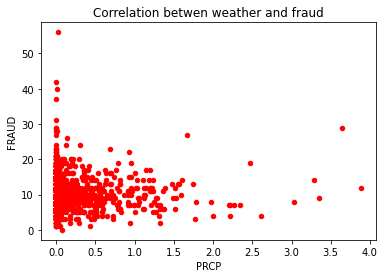

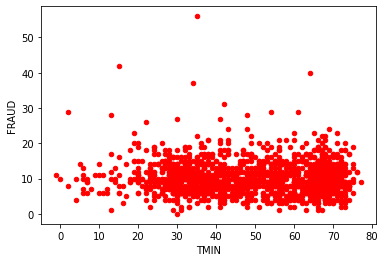

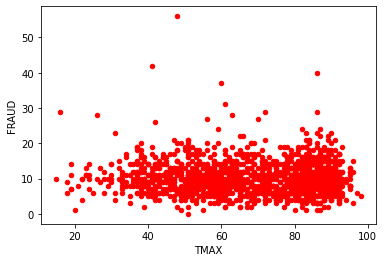

In [171]:
#What is the correlation between weather and fraud per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['FRAUD']))
date_crime_count_df.plot(x='PRCP', y='FRAUD', kind='scatter', color='red', title="Correlation betwen weather and fraud" )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['FRAUD']))
date_crime_count_df.plot(x='TMIN', y='FRAUD', kind='scatter', color='red', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['FRAUD']))
date_crime_count_df.plot(x='TMAX', y='FRAUD', kind='scatter', color='red', )

(-0.002121747176671367, 0.9354178699911067)
(0.1337072797811129, 2.9071303084196395e-07)
(0.143806232445423, 3.376069200964198e-08)


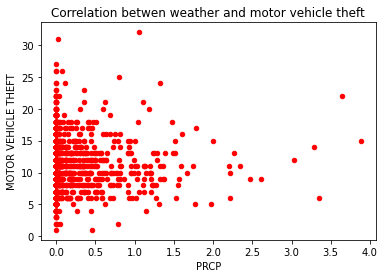

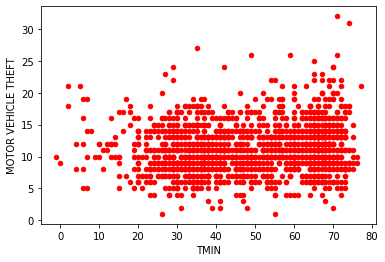

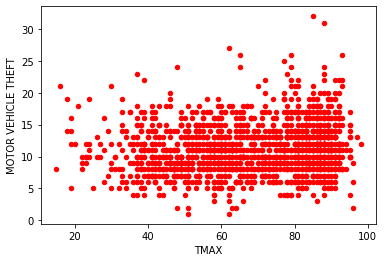

In [172]:
#What is the correlation between weather and motor vehicle theft per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['MOTOR VEHICLE THEFT']))
date_crime_count_df.plot(x='PRCP', y='MOTOR VEHICLE THEFT', kind='scatter', color='red', title="Correlation betwen weather and motor vehicle theft" )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['MOTOR VEHICLE THEFT']))
date_crime_count_df.plot(x='TMIN', y='MOTOR VEHICLE THEFT', kind='scatter', color='red', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['MOTOR VEHICLE THEFT']))
date_crime_count_df.plot(x='TMAX', y='MOTOR VEHICLE THEFT', kind='scatter', color='red', )

In [173]:
# date_crime_count_df['NUMBER_OF_CRIMES'] = crime_series
# date_crime_count_df['ASSAULT'] = assault_series
# date_crime_count_df['THEFT'] = theft_series
# date_crime_count_df['OTHER'] = other_series
# date_crime_count_df['DRUGS'] = drugs_series
# date_crime_count_df['VEHICLE BREAKINS'] = vehicle_break_series
# date_crime_count_df['VANDALISM'] = vandalism_series
# date_crime_count_df['BURGLARY'] = burglary_series
# date_crime_count_df['MOTOR VEHICLE THEFT'] = motor_vehicle_theft_series
# date_crime_count_df['FRAUD'] = fraud_series
# date_crime_count_df['ROBBERY'] = robbery_series
# date_crime_count_df['WEAPONS'] = weapons_series
# date_crime_count_df['SEX CRIMES'] = sex_crimes_series
# date_crime_count_df['DISTURBING PEACE'] = disturbing_peace_series
# date_crime_count_df['HOMICIDE'] = homicide_series
# date_crime_count_df['ARSON'] = arson_series
# date_crime_count_df['DUI'] = dui_series
